## Comparison Of Banana Musa acuminata x Musa balbisiana 'Pisang Awak' Ripening Time And Morphological Relationship With Deep Learning Convolutional Neural Network(CNNs)

### โปรเจคคร่าว ๆ


ใช้ความรู้ทางคอมพิวเตอร์
1.   Deep Learning (Convolutional Neural Network)
2.   Computer Vision (Opencv)
3.  Data Analytics
4.  Data Prediction

Software
> Google Colaboratory , Jupyter Notebook

จุดประสงค์

> เพื่อระบุวันที่กล้วยจะสุกได้แม่นยำมากยิ่งขึ้น รวมไปถึงการต่อยอดสำหรับบริษัทส่งออกกล้วย คัดแยกกล้วยว่าระยะไหนที่ควจจะดำเนินการ

การ Input Data


> Image processing: เรียนรู้ลักษณะภายนอกโดยเฉพาะสี

สายพันธุ์ของกล้วย


> Musa acuminata × Musa balbisiana 'Pisang Awak' (กล้วยน้ำว้า)

การประยุกต์หรือ deploy

1.   Web Application
2.   Heroku / Flask





### CNNs Trainning Set

In [ ]:
import tensorflow as tf
!pip install keras

In [ ]:
import numpy as np
import cv2
import os
from tqdm import tqdm
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D

In [ ]:
from os import listdir
from os.path import isfile, join

In [ ]:
!wget http://techno.varee.ac.th/colab/mosquito.zip
!unzip --qq mosquito.zip

--2021-07-03 04:21:20--  http://techno.varee.ac.th/colab/mosquito.zip
Resolving techno.varee.ac.th (techno.varee.ac.th)... 110.164.57.36
Connecting to techno.varee.ac.th (techno.varee.ac.th)|110.164.57.36|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 28715057 (27M) [application/zip]
Saving to: ‘mosquito.zip’

mosquito.zip        100%[===================>]  27.38M  5.13MB/s    in 6.8s    

2021-07-03 04:21:28 (4.03 MB/s) - ‘mosquito.zip’ saved [28715057/28715057]



In [ ]:
width = 128
num_classes = 2
trainpath = 'train/'
testpath = 'test/'
trainImg = [trainpath+f for f in listdir(trainpath) if listdir(join(trainpath, f))]
testImg = [testpath+f for f in listdir(testpath) if listdir(join(testpath, f))]

In [ ]:
testImg

['test/Aedes', 'test/Culex']

In [ ]:
def img2data(path):
  rawImgs = []
  labels = []
  c = 0
  for imagePath in (path):
      for item in tqdm(os.listdir(imagePath)):
          file = os.path.join(imagePath, item)
          #print(file)
          c+=1
          l = imagePath.split('/')[3]
          if l == 'Period1':
            labels.append([1,0,0])         
          elif l == 'Period2':
            labels.append([0,1,0])
          elif l == 'Period3':
            labels.append([0,0,1])
          img = cv2.imread(file , cv2.COLOR_BGR2RGB)
          img = cv2.resize(img ,(width,width))
          rawImgs.append(img)
  return rawImgs, labels

In [ ]:
x_train, y_train = img2data(trainImg)
x_test, y_test = img2data(testImg)

100%|██████████| 30/30 [00:00<00:00, 933.24it/s]


In [ ]:
x_train = np.array(x_train)
y_train = np.array(y_train)
x_test = np.array(x_test)
y_test = np.array(y_test)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

In [ ]:
x_train.shape,y_train.shape,x_test.shape, y_test.shape

((1200, 128, 128, 3), (1200, 2), (60, 128, 128, 3), (60, 2))

In [ ]:
model = keras.Sequential([
        keras.layers.Conv2D(128, (3,3), activation='relu', input_shape=(width, width, 3)),
        keras.layers.MaxPooling2D(pool_size=(2, 2)),
        keras.layers.Conv2D(128,(3,3) , activation='relu'),
        keras.layers.MaxPooling2D(pool_size=(2,2 )),
        keras.layers.Dense(16),
        keras.layers.Flatten(),

        keras.layers.Dense(num_classes, activation='softmax') #softmax for one hot . . # sigmoid for 0/1
    ])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 126, 126, 128)     3584      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 63, 63, 128)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 61, 61, 128)       147584    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 30, 30, 128)       0         
_________________________________________________________________
dense (Dense)                (None, 30, 30, 16)        2064      
_________________________________________________________________
flatten (Flatten)            (None, 14400)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 2

In [ ]:
model.compile(optimizer=keras.optimizers.RMSprop(lr=0.0001), loss='categorical_crossentropy'
                , metrics= ['accuracy'])
batch_size = 32
epochs = 10

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [ ]:
history = model.fit(x_train, y_train ,batch_size=batch_size, epochs=epochs ,validation_data=(x_test, y_test))


Epoch 1/10
38/38 [==============================] - 45s 76ms/step - loss: 0.6369 - accuracy: 0.6436 - val_loss: 0.5432 - val_accuracy: 0.7833
Epoch 2/10
38/38 [==============================] - 1s 38ms/step - loss: 0.4683 - accuracy: 0.8049 - val_loss: 0.4770 - val_accuracy: 0.8167
Epoch 3/10
38/38 [==============================] - 1s 38ms/step - loss: 0.3314 - accuracy: 0.8896 - val_loss: 0.3405 - val_accuracy: 0.8333
Epoch 4/10
38/38 [==============================] - 1s 38ms/step - loss: 0.2713 - accuracy: 0.8972 - val_loss: 0.3366 - val_accuracy: 0.8167
Epoch 5/10
38/38 [==============================] - 1s 38ms/step - loss: 0.2080 - accuracy: 0.9313 - val_loss: 0.2680 - val_accuracy: 0.8833
Epoch 6/10
38/38 [==============================] - 1s 37ms/step - loss: 0.1674 - accuracy: 0.9519 - val_loss: 0.2522 - val_accuracy: 0.9000
Epoch 7/10
38/38 [==============================] - 1s 38ms/step - loss: 0.1325 - accuracy: 0.9576 - val_loss: 0.1610 - val_accuracy: 0.9833
Epoch 8/10
3

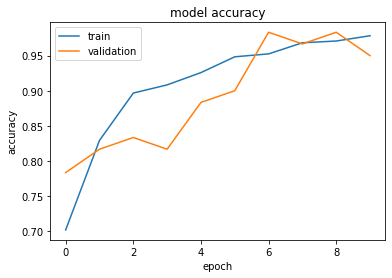

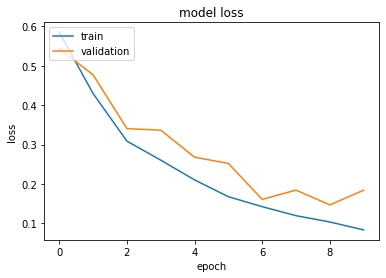

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# "Loss"
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()



---



---



Transfer learning with MobilenetV2

In [ ]:
base_model = keras.applications.MobileNetV2(input_shape=(width,width,3),
                                                   include_top=False,
                                                   weights='imagenet')
base_model.trainable = False
num_classes = 2

model = keras.Sequential([
        base_model,
        keras.layers.Conv2D(256, 3, activation='relu'),
        
        keras.layers.Conv2D(128, 3, activation='relu'),
        keras.layers.MaxPooling2D(pool_size=(2, 2)),
        keras.layers.Dropout(0.25),
        keras.layers.Dense(16),
        keras.layers.Flatten(),
        keras.layers.Dense(num_classes, activation='softmax')
    ])


AttributeError: ignored

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 126, 126, 128)     3584      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 63, 63, 128)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 61, 61, 128)       147584    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 30, 30, 128)       0         
_________________________________________________________________
dense (Dense)                (None, 30, 30, 16)        2064      
_________________________________________________________________
flatten (Flatten)            (None, 14400)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 2

In [ ]:
model.compile(optimizer=keras.optimizers.RMSprop(lr=0.0001), loss='categorical_crossentropy'
                , metrics= ['accuracy'], weighted_metrics=['accuracy'])

batch_size = 32
epochs = 10

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [ ]:
history = model.fit(x_train, y_train ,batch_size=batch_size, epochs=epochs ,validation_data=(x_test, y_test))


Epoch 1/10
38/38 [==============================] - 3s 53ms/step - loss: 0.1347 - accuracy: 0.9537 - weighted_accuracy: 0.9537 - val_loss: 0.1939 - val_accuracy: 0.9500 - val_weighted_accuracy: 0.9500
Epoch 2/10
38/38 [==============================] - 1s 39ms/step - loss: 0.0583 - accuracy: 0.9873 - weighted_accuracy: 0.9873 - val_loss: 0.1737 - val_accuracy: 0.9833 - val_weighted_accuracy: 0.9833
Epoch 3/10
38/38 [==============================] - 1s 39ms/step - loss: 0.0574 - accuracy: 0.9826 - weighted_accuracy: 0.9826 - val_loss: 0.1572 - val_accuracy: 0.9833 - val_weighted_accuracy: 0.9833
Epoch 4/10
38/38 [==============================] - 1s 39ms/step - loss: 0.0552 - accuracy: 0.9781 - weighted_accuracy: 0.9781 - val_loss: 0.1760 - val_accuracy: 0.9667 - val_weighted_accuracy: 0.9667
Epoch 5/10
38/38 [==============================] - 1s 39ms/step - loss: 0.0543 - accuracy: 0.9860 - weighted_accuracy: 0.9860 - val_loss: 0.1563 - val_accuracy: 0.9833 - val_weighted_accuracy: 0.

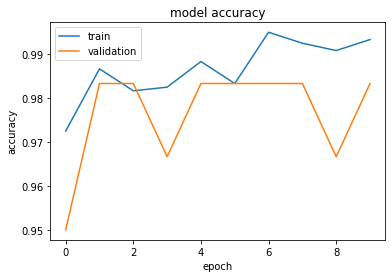

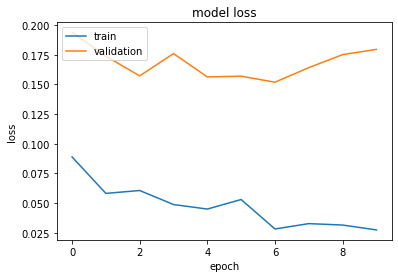

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# "Loss"
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()



---



---


This for try out your image

In [ ]:
testpath = 'test/'
testImg = [testpath+f for f in listdir(testpath) if listdir(join(testpath, f))]
rimg = []
for imagePath in (testImg):
    for item in (os.listdir(imagePath)):
        file = os.path.join(imagePath, item)
        if item.split('.')[0] != "":
           
          img = cv2.imread(file , cv2.COLOR_BGR2RGB)
          ori = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
          img = cv2.resize(img ,(width,width))
          rimg = np.array(img)
          rimg = rimg.astype('float32')
          rimg /= 255
          rimg = np.reshape(rimg ,(1,128,128,3))
          predict = model.predict(rimg)
          label = ['Aedes','Culex']
          result = label[np.argmax(predict)]
          print(predict)
          print('real:'+str(item))
          print('predict:'+str(result))
          #cv2.putText(img, 'real:'+str(item), (10,10), cv2.FONT_HERSHEY_SIMPLEX, 0.2, (255,0,))
          #cv2.putText(img, 'predict'+str(result), (10,30), cv2.FONT_HERSHEY_SIMPLEX, 0.2, (255,0,0))
          plt.imshow(ori)
          plt.show()



Output hidden; open in https://colab.research.google.com to view.